In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
import sys
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cut_tree
from kmeans import get_wc_ssd, get_SC, get_NMI

In [2]:
digits_embedding = genfromtxt('digits-embedding.csv', delimiter=',')

In [3]:
np.random.seed(0)
data = []
for i in range(10):
    class_i_digits = digits_embedding[digits_embedding[:,1]==i]
    digits = np.random.randint(0, len(class_i_digits), size=10)
    for digit in digits:
        data.append(class_i_digits[digit])
data = np.array(data)   

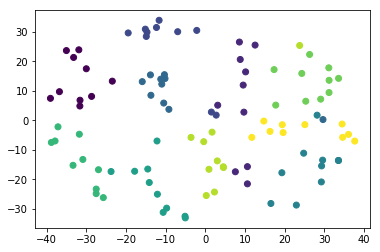

In [4]:
# plt.scatter(data[:,2],data[:,3], c=data[:,1])
# plt.show()

In [5]:
def plot_dendogram(Z, max_d, annotate_above):
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('digit id')
    plt.ylabel('distance')
    R=dendrogram(
        Z,
    #     truncate_mode='lastp',
    #     p=12,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8., # font size for the x axis labels
        show_contracted=True,
    )
    for i, d, c in zip(R['icoord'], R['dcoord'], R['color_list']):
                x = 0.5 * sum(i[1:3])
                y = d[1]
                if y > annotate_above:
                    plt.plot(x, y, 'o', c=c)
                    plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                                 textcoords='offset points',
                                 va='top', ha='center')
    if max_d:
        plt.axhline(y=max_d, c='k')
    plt.show()
    return R

In [6]:
def plot_graph(x_axis, y_axis, x_axis_label, y_axis_label, legend, fig_name):
    plt.plot(x_axis, y_axis)

    
    x_axis_label = x_axis_label
    y_axis_label = y_axis_label
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.legend(legend, loc='best')

    plt.title(y_axis_label + ' v/s ' + x_axis_label)
#     plt.show()
    plt.savefig(fig_name,dpi=300)

    plt.show()

[71747.07972353288, 51864.197742459764, 22128.496849953954, 9536.55384472865, 1526.3932600118617]
[0.17474227799396083, 0.35401227865281326, 0.5582422089970367, 0.6807030890285265, 0.7588432649707043]
[0.08860818323755504, 0.22485964667211, 0.31604379301166313, 0.36566354073042906, 0.38852126174469687]


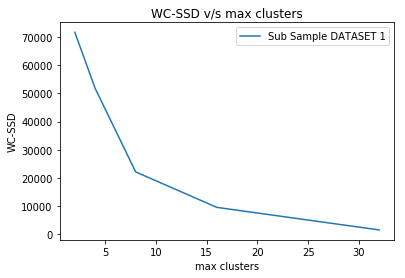

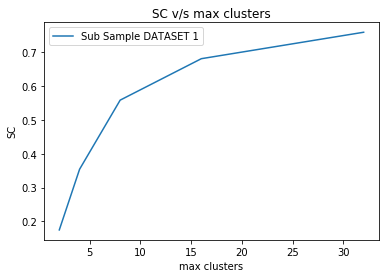

[46210.03416576287, 24176.35606289241, 9263.607734953655, 3094.921436390568, 855.889300225919]
[0.3756186357114991, 0.5209311298044579, 0.6801508178809926, 0.7911308104575606, 0.8666821321159998]
[0.17924140194238725, 0.2724034972102207, 0.35960588912654284, 0.38557372934411543, 0.3823659421290183]


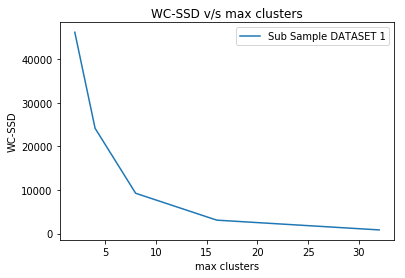

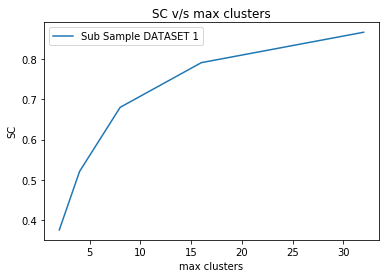

[45000.878884274796, 24684.542575886462, 9519.152307057335, 2907.5909342855502, 885.1230673650626]
[0.37882833757538464, 0.5188669166939768, 0.6817409478422136, 0.8030750167590647, 0.8310565611972011]
[0.18255756775570997, 0.25727385178345413, 0.3390635563554162, 0.38682001063037524, 0.3821231076878127]


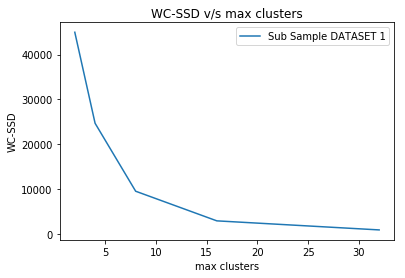

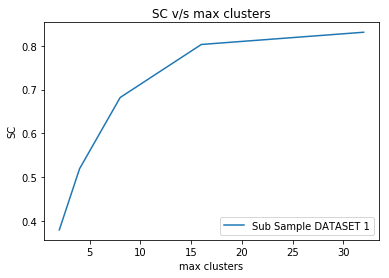

In [12]:
methods = ['single', 'complete', 'average']
features = data[:,2:4]
for method in methods: 
    Z = linkage(features, method=method)

    max_d=500
    plot_dendogram(Z, max_d, 10)

    k_list = [2,4,8,16,32]
#     k_list = [2]
    wc_ssd_values = []
    sc_values = []
    
    nmi_values = []
    for k in k_list:
        cluster_indices = cut_tree(Z,k)
        features_labels = np.column_stack((features, cluster_indices))
        centroids = {}
        for cluster_id in range(k):
            cluster_members = features[features_labels[:,2] == cluster_id]
            centroid = np.average(cluster_members, axis=0)
            centroids[cluster_id]=centroid
        wc_ssd_values.append(get_wc_ssd(centroids, features, features_labels[:,2]))
        sc_values.append(get_SC(features, features_labels[:,2]))
        nmi_values.append(get_NMI(features, features_labels[:,2], data[:,1]))
    print (wc_ssd_values)
    print (sc_values)
    print (nmi_values)
    plot_graph(k_list, wc_ssd_values, 'max clusters','WC-SSD',['Sub Sample DATASET 1'], 'hierarchical_'+str(method))
    plot_graph(k_list, sc_values, 'max clusters','SC',['Sub Sample DATASET 1'], 'hierarchical_'+str(method))

In [10]:
Z = linkage(features, method='single')
np.unique(cut_tree(Z,8), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([19, 50,  8,  2,  1, 15,  1,  4]))